# Regressão Linear com Dataset de Saúde
Este notebook realiza uma análise de regressão linear utilizando dados do dataset de saúde.
Ele explora a relação entre despesas totais de saúde e um indicador de cobertura.

In [1]:
# Importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Configurações de exibição
sns.set()
plt.rcParams['figure.figsize'] = (15, 9)

In [4]:
# Carregar o dataset
dataset_path = '../datasets/uf_limpo.csv'
saude = pd.read_csv(dataset_path)

# Exibir informações iniciais
print(saude.head())

    ano sigla_uf     cob_ab    cob_acs    cob_esf  cob_vac_bcg  cob_vac_rota  \
0  2010       AC  75.558215  87.753425  64.064896        100.0     66.749718   
1  2010       AL  78.580644  77.051768  72.961540        100.0     74.794916   
2  2010       AM  65.216161  69.136690  50.478242        100.0     58.681194   
3  2010       AP  90.042754  89.235233  73.277913        100.0     73.531058   
4  2010       BA  66.063220  82.518806  59.840187        100.0     72.142332   

   cob_vac_menin  cob_vac_pneumo  cob_vac_polio  ...  desp_recp_saude_pc_mun  \
0       0.652842        4.864448     100.000000  ...              114.166340   
1       3.434813        6.652844     100.000000  ...              124.854673   
2       2.051782        7.585714      92.480398  ...              163.538580   
3       0.395436        4.546726      90.752658  ...              111.239863   
4      64.723803        2.831480      95.929891  ...              120.605392   

   pct_desp_recp_saude_uf  desp_tot_sa

## Regressão Linear
Vamos explorar a relação entre as despesas totais de saúde per capita e a cobertura da atenção básica.

In [5]:
# Selecionar variáveis para regressão
X = saude['desp_tot_saude_pc_mun'].values.reshape(-1, 1)  # Variável independente
y = saude['cob_ab'].values.reshape(-1, 1)  # Variável dependente

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo
lin_regr = linear_model.LinearRegression()
lin_regr.fit(X_train, y_train)

# Fazer previsões
y_pred = lin_regr.predict(X_test)

# Exibir coeficientes e métricas
print(f'Coeficiente: {lin_regr.coef_[0][0]:.2f}')
print(f'Intercepto: {lin_regr.intercept_[0]:.2f}')
print(f'Erro Quadrático Médio: {mean_squared_error(y_test, y_pred):.2f}')
print(f'R²: {r2_score(y_test, y_pred):.2f}')

Coeficiente: 0.01
Intercepto: 72.50
Erro Quadrático Médio: 140.66
R²: 0.08


Coeficiente da Regressão: O coeficiente de 0.01 indica que, para cada aumento de R$ 100,00 nas despesas per capita, a cobertura da atenção básica aumenta, em média, apenas 1 ponto percentual. Esse valor sugere uma relação muito fraca entre as variáveis.

Intercepto: O intercepto de 72.50 implica que, mesmo com zero gasto per capita (teoricamente), a cobertura média estimada da atenção básica seria de cerca de 72.5%.

Erro Quadrático Médio: Um erro de 140.66 mostra que a precisão das previsões está longe de ser ideal, com uma grande variabilidade nos dados.

Coeficiente de Determinação (R²): Com um R² de apenas 0.08, o modelo explica apenas 8% da variação na cobertura da atenção básica com base no gasto per capita. Isso reforça que a relação entre essas variáveis é muito fraca e outros fatores podem ter maior impacto na cobertura da atenção básica.

## Visualização da Regressão Linear
O gráfico abaixo mostra a linha de regressão e os pontos de dados.

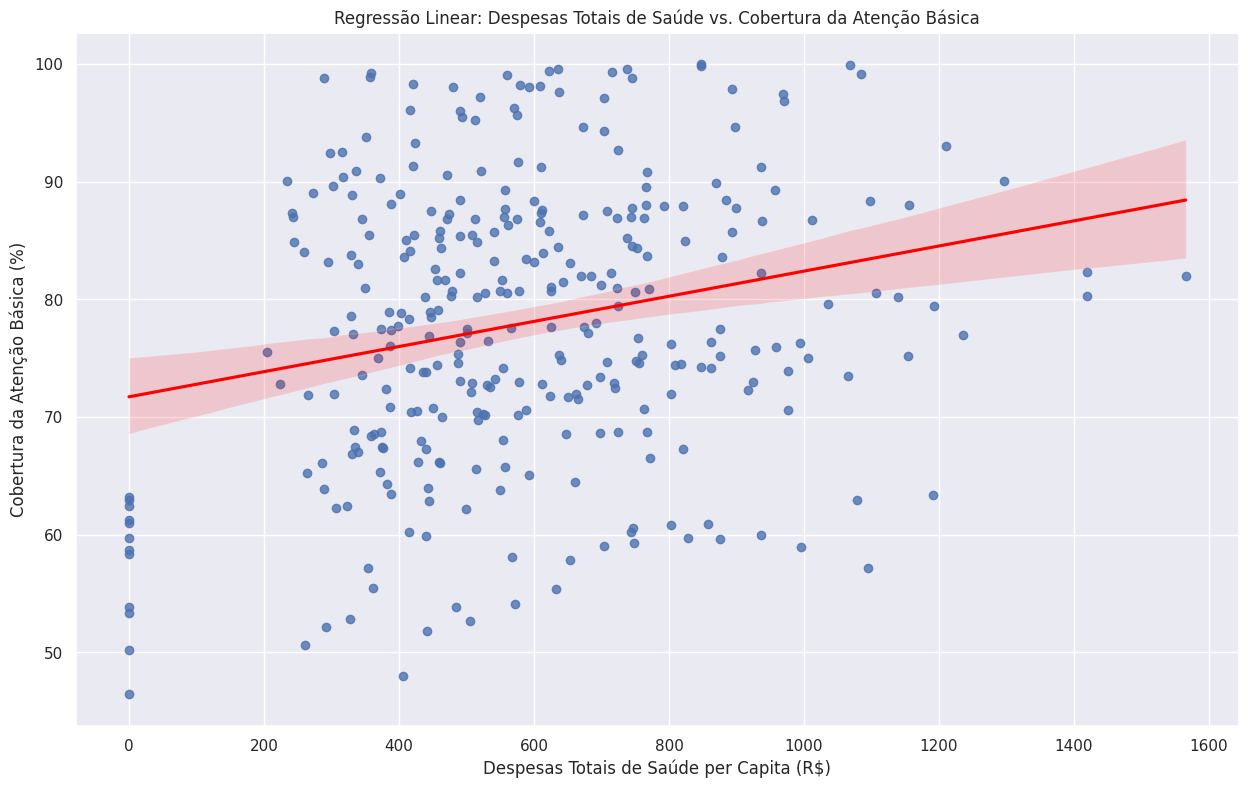

In [6]:
# Plotar a regressão linear
sns.regplot(x='desp_tot_saude_pc_mun', y='cob_ab', data=saude, line_kws={'color': 'red'})
plt.title('Regressão Linear: Despesas Totais de Saúde vs. Cobertura da Atenção Básica')
plt.xlabel('Despesas Totais de Saúde per Capita (R$)')
plt.ylabel('Cobertura da Atenção Básica (%)')
plt.show()

A análise de regressão linear mostra que o gasto per capita em saúde tem uma relação muito fraca com a cobertura da atenção básica. O coeficiente de 0.01 indica que um aumento de R$ 100,00 nas despesas per capita resulta, em média, em apenas 1 ponto percentual a mais na cobertura. Com um R² de apenas 0.08, o modelo explica apenas 8% da variação na cobertura, indicando que outros fatores, como gestão de recursos e políticas públicas, têm maior impacto. Embora exista uma leve tendência positiva, o gasto per capita isoladamente não é determinante para a expansão da cobertura da atenção básica.

